In [16]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [116]:
base = pd.read_csv('dataset.csv')
base.head()

,date,avg_temperature,min_temperature,max_temperature,precipitation,is_weekend,beer_consumption
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [119]:
base.isna().sum()

date                576
avg_temperature     576
min_temperature     576
max_temperature     576
precipitation       576
is_weekend          576
beer_consumption    576
dtype: int64

In [120]:
base = base.dropna()
base.isna().sum()

date                0
avg_temperature     0
min_temperature     0
max_temperature     0
precipitation       0
is_weekend          0
beer_consumption    0
dtype: int64

In [121]:
base.dtypes

date                 object
avg_temperature      object
min_temperature      object
max_temperature      object
precipitation        object
is_weekend          float64
beer_consumption    float64
dtype: object

(array([  3.,  16.,  52.,  72.,  74.,  54.,  49.,  30.,  10.,   5.]),
 array([ 14.343 ,  16.7024,  19.0618,  21.4212,  23.7806,  26.14  ,
         28.4994,  30.8588,  33.2182,  35.5776,  37.937 ]),
 <a list of 10 Patch objects>)

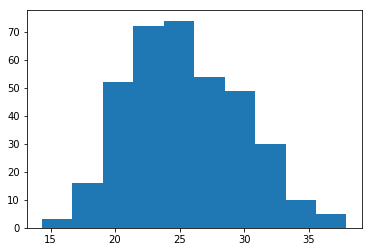

In [122]:
consumption = base.iloc[:, -1].values
plt.hist(consumption)

In [123]:
base['avg_temperature'] = base['avg_temperature'].str.replace(',', '.')

base['min_temperature'] = base['min_temperature'].str.replace(',', '.')

base['max_temperature'] = base['max_temperature'].str.replace(',', '.')

base['precipitation'] = base['precipitation'].str.replace(',', '.')

In [124]:
base['avg_temperature'] = base['avg_temperature'].astype(float)

base['min_temperature'] = base['min_temperature'].astype(float)

base['max_temperature'] = base['max_temperature'].astype(float)

base['precipitation'] = base['precipitation'].astype(float)

base['is_weekend'] = base['is_weekend'].astype(bool)

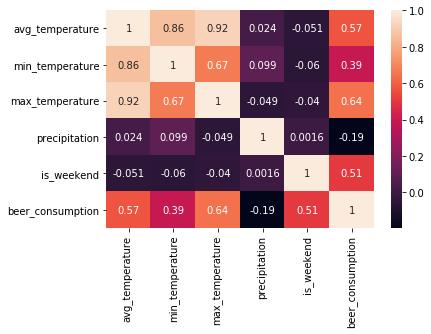

In [125]:
sns.heatmap(base.corr(), annot=True)

Text(0,0.5,'Beer consumption')

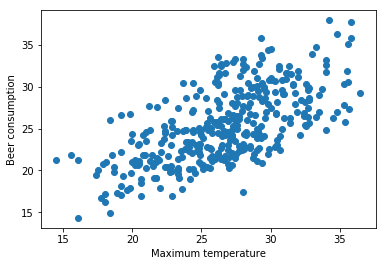

In [126]:
x = base['max_temperature'].values
x = x.reshape(-1, 1)
y = base['beer_consumption'].values
plt.scatter(x, y)
plt.xlabel('Maximum temperature')
plt.ylabel('Beer consumption')

In [128]:
model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0,0.5,'Beer consumption')

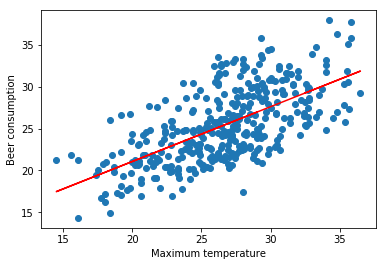

In [130]:
plt.scatter(x, y)
plt.plot(x, model.predict(x), color='red')
plt.xlabel('Maximum temperature')
plt.ylabel('Beer consumption')

In [131]:
model.predict(38)

array([ 32.85907157])